# EDA

### Importing libraries

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tensorflow import keras
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [8]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.7.0 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
orbax-checkpoint 0.3.0 requires jax>=0.4.9, but you have jax 0.3.25 which is incompatible.


In [9]:
!pip install kaggle


In [10]:
from google.colab import files

# Upload the kaggle.json file when prompted
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deepapaikar","key":"73ad849fb0f17bceeabf4fe96753255e"}'}

In [11]:
# Move the kaggle.json file to the appropriate location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [12]:
# Replace 'dataset-name' with the actual dataset name from Kaggle
!kaggle datasets download -d adityakharosekar2/guardian-news-articles -p /content/


 97% 271M/278M [00:02<00:00, 72.2MB/s]
100% 278M/278M [00:03<00:00, 96.5MB/s]


In [13]:
import zipfile

# Replace 'file_name.zip' with the actual name of your zip file
with zipfile.ZipFile('/content/guardian-news-articles.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


### Importing csv file

### Creating pandas dataframe

In [14]:
import io
# Storing the dataset in a Pandas Dataframe
df = pd.read_csv('guardian_articles.csv')


### Analysis on the dataframe

In [15]:
#checking out the dataframe
df.head()

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id
0,us-news/2016/jan/31/iowa-caucus-underdog-candi...,US news,Iowa underdogs put on brave faces despite all ...,https://www.theguardian.com/us-news/2016/jan/3...,As polling day looms and the cameras turn only...,2016-01-31T23:53:37Z,1
1,us-news/2016/jan/31/iowa-caucus-worlds-most-pa...,US news,Iowa caucus: hologram eagle and Jesus star on ...,https://www.theguardian.com/us-news/2016/jan/3...,"In Des Moines on Sunday, the Guardian was give...",2016-01-31T23:46:28Z,2
2,world/2016/jan/31/tanzania-britsh-helicopter-p...,World news,British pilot in Tanzania 'manoeuvred ​to save...,https://www.theguardian.com/world/2016/jan/31/...,A British pilot who was shot dead by an elepha...,2016-01-31T23:43:48Z,3
3,football/2016/jan/31/late-winner-gets-usa-off-...,Football,USA 3-2 Iceland | International friendly match...,https://www.theguardian.com/football/2016/jan/...,USA took a step toward shaking off the ghosts ...,2016-01-31T23:30:49Z,4
4,football/2016/jan/31/blackburn-paul-lambert-ox...,Football,Reinvigorated Paul Lambert reflects after impr...,https://www.theguardian.com/football/2016/jan/...,"The clean-shaven, spectacle free and suspiciou...",2016-01-31T22:30:10Z,5


In [ ]:
# To display all the columns in the DataFrame
print(df.columns)

Index(['article_id', 'sectionName', 'webTitle', 'webUrl', 'bodyContent',
       'webPublicationDate', 'id'],
      dtype='object')


* There are 7 columns present in our dataset

In [ ]:
# Get an overview of the dataset's columns and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149839 entries, 0 to 149838
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   article_id          149839 non-null  object
 1   sectionName         149839 non-null  object
 2   webTitle            149839 non-null  object
 3   webUrl              149839 non-null  object
 4   bodyContent         148731 non-null  object
 5   webPublicationDate  149839 non-null  object
 6   id                  149839 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 8.0+ MB
None


* Total number of rows :149839

In [ ]:
#Looking at the count of all the columns
df.count()

article_id            149839
sectionName           149839
webTitle              149839
webUrl                149839
bodyContent           148731
webPublicationDate    149839
id                    149839
dtype: int64

* We can see the count for bodyContent column is less by 8





In [ ]:
# Check the number of unique values in each column
print(df.nunique())

article_id            149828
sectionName              164
webTitle              148197
webUrl                149828
bodyContent           148440
webPublicationDate    120658
id                    149839
dtype: int64


#### Inference
* Total number of rows are 149828
*  The sectionName column has 164 unique values
*  There are some duplicate values in webTitle and bodyContent .
* Some pieces would have been published on the same date so they have some duplicate values in webPublicationDate





In [ ]:
## Able to see some duplicate titles
# Count the number of duplicate titles
duplicate_title_counts = df['webTitle'].duplicated().sum()

# Calculate the percentage of duplicate titles
duplicate_title_percentage = (duplicate_title_counts / len(df['webTitle'])) * 100

# Print the results
print("Number of Duplicate Titles:", duplicate_title_counts)
print("Percentage of Duplicate Titles: {:.2f}%".format(duplicate_title_percentage))


Number of Duplicate Titles: 1642
Percentage of Duplicate Titles: 1.10%


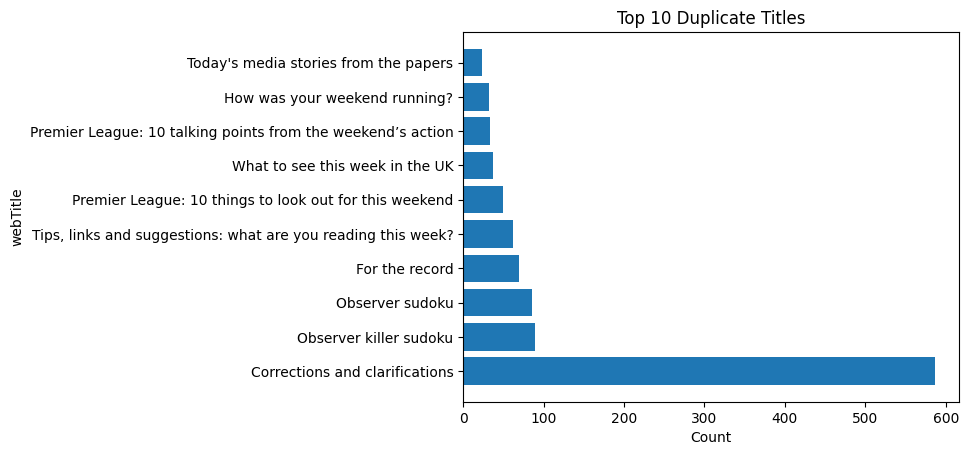

In [ ]:
# Count the occurrences of each title
title_counts = df['webTitle'].value_counts()

# Filter for duplicate titles
duplicate_titles = title_counts[title_counts > 1]

# Select the top 10 duplicate titles
top_duplicate_titles = duplicate_titles.head(10)

# Plot a bar chart of the top 10 duplicate titles
plt.barh(top_duplicate_titles.index, top_duplicate_titles.values)
plt.xlabel('Count')
plt.ylabel('webTitle')
plt.title('Top 10 Duplicate Titles')
plt.show()




### Inference
* We can clearly see that titles like "sudoku" , "correction" , "weekend stuff" are the duplicate titles , these are the kind of topics that keeps on repeating and are very common .

In [ ]:
#There is a column which contains all the URL , looking at the list
df[['webUrl']]

,webUrl
0,https://www.theguardian.com/us-news/2016/jan/3...
1,https://www.theguardian.com/us-news/2016/jan/3...
2,https://www.theguardian.com/world/2016/jan/31/...
3,https://www.theguardian.com/football/2016/jan/...
4,https://www.theguardian.com/football/2016/jan/...
...,...
149834,https://www.theguardian.com/world/2022/jun/21/...
149835,https://www.theguardian.com/music/2022/jun/22/...
149836,https://www.theguardian.com/australia-news/202...
149837,https://www.theguardian.com/australia-news/202...


* The dataset has 149839 rows for webUrl

In [ ]:
# To display the full URLs without truncation
#These URLs can be used to access the news and do summarization
pd.set_option('display.max_colwidth', None)
print(df[['webUrl']])

                                                                                                                                                                webUrl
0                                                                     https://www.theguardian.com/us-news/2016/jan/31/iowa-caucus-underdog-candidates-omalley-huckabee
1                                                              https://www.theguardian.com/us-news/2016/jan/31/iowa-caucus-worlds-most-patriotic-tractor-mike-huckabee
2                                              https://www.theguardian.com/world/2016/jan/31/tanzania-britsh-helicopter-pilot-roger-gower-shot-down-three-men-arrested
3                                                   https://www.theguardian.com/football/2016/jan/31/late-winner-gets-usa-off-to-winning-start-in-2016-against-iceland
4                                                                                https://www.theguardian.com/football/2016/jan/31/blackburn-paul-lambert-oxford-fa-cu

Number of Duplicate  URLs: 11
Percentage of Duplicate  URLs: 0.01%


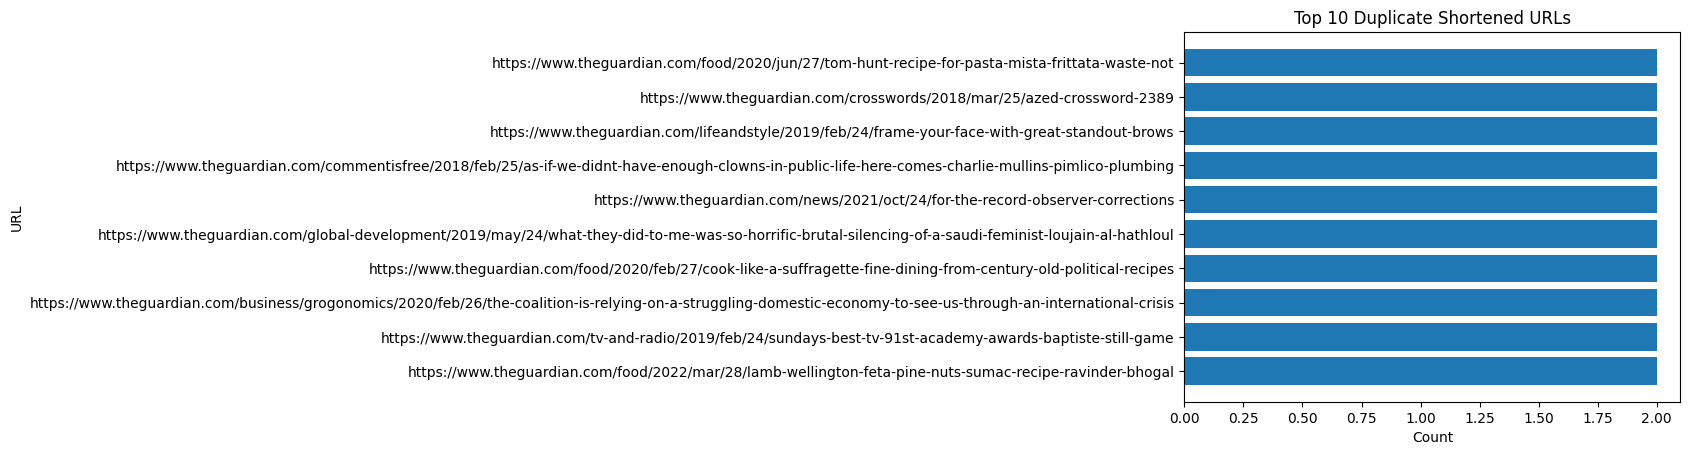

In [ ]:
## Able to see duplicate URLs
import urllib.parse

# Shorten URLs for display
urls = df['webUrl']

# Count the number of duplicate shortened URLs
duplicate_url_counts = urls.duplicated().sum()

# Calculate the percentage of duplicate shortened URLs
duplicate_url_percentage = (duplicate_url_counts / len(urls)) * 100

# Print the results
print("Number of Duplicate  URLs:", duplicate_url_counts)
print("Percentage of Duplicate  URLs: {:.2f}%".format(duplicate_url_percentage))

# Get the top 10 duplicate shortened URLs with their counts
top_duplicate_urls = urls.value_counts().head(10)

# Plot a bar chart of the top 10 duplicate shortened URLs
plt.barh(top_duplicate_urls.index, top_duplicate_urls.values)
plt.xlabel('Count')
plt.ylabel('URL')
plt.title('Top 10 Duplicate Shortened URLs')
plt.show()



In [ ]:
# Find titles with duplicate URLs
import pandas as pd
import urllib.parse

# Find duplicate URLs
duplicate_urls = df[df.duplicated(subset='webUrl', keep=False)]


# Group by URL and collect titles as comma-separated values
title_duplicate_url = duplicate_urls.groupby('webUrl')['webTitle'].apply(lambda x: ', '.join(x)).reset_index()


# Display the table
print(title_duplicate_url)



                                                                                                                                                              webUrl  \
0                                                       https://www.theguardian.com/books/2021/aug/25/top-10-gripes-in-literature-lucy-ellmann-things-are-against-us   
1   https://www.theguardian.com/business/grogonomics/2020/feb/26/the-coalition-is-relying-on-a-struggling-domestic-economy-to-see-us-through-an-international-crisis   
2                 https://www.theguardian.com/commentisfree/2018/feb/25/as-if-we-didnt-have-enough-clowns-in-public-life-here-comes-charlie-mullins-pimlico-plumbing   
3                                                                                             https://www.theguardian.com/crosswords/2018/mar/25/azed-crossword-2389   
4                                                https://www.theguardian.com/food/2020/feb/27/cook-like-a-suffragette-fine-dining-from-century-old-political-rec

In [ ]:
#Title and category will be used for calssification
# creating a new dataset with only relevant features.
df1 = df[['webTitle','bodyContent']]
df1.head()

webTitle  \
0            Iowa underdogs put on brave faces despite all but inevitable defeats   
1  Iowa caucus: hologram eagle and Jesus star on America's most patriotic tractor   
2        British pilot in Tanzania 'manoeuvred ​to save colleague​​ before death'   
3                           USA 3-2 Iceland | International friendly match report   
4            Reinvigorated Paul Lambert reflects after improved Blackburn display   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

* Able to see the title with content , this should be good for summarization



In [ ]:
#shuffling rows with the help of sample, here (frac = 1) means return all rows
df2 = df1.sample(frac=1).reset_index(drop=True)
df2.head()

webTitle  \
0                           Talking Horses: 'Premier League squad' lined up for Charlie Hall   
1                'It's not like Trinny and Susannah' – John Lewis turns to personal stylists   
2              Mammoth task: billionaire Peter Thiel funded effort to resurrect woolly beast   
3  Investigation that cleared government in transparency case failed to speak to key witness   
4                  Ten years of photo reportage from Libyan traffickers to Mugabe’s Zimbabwe   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
#checking for null values
df2.isnull().sum()

webTitle          0
bodyContent    1108
dtype: int64

Number of Unique sections : 164


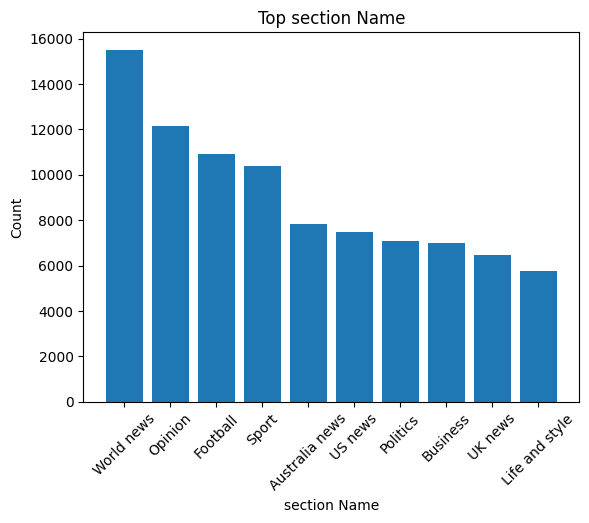

In [ ]:
# Count the number of section Names
num_unique_sectionName = df['sectionName'].nunique()

# Print the number of unique publishers
print("Number of Unique sections :", num_unique_sectionName)

# Plot a bar chart of the top publishers
top_publishers = df['sectionName'].value_counts().head(10)
plt.bar(top_publishers.index, top_publishers.values)
plt.xlabel('section Name')
plt.ylabel('Count')
plt.title('Top section Name')
plt.xticks(rotation=45)
plt.show()



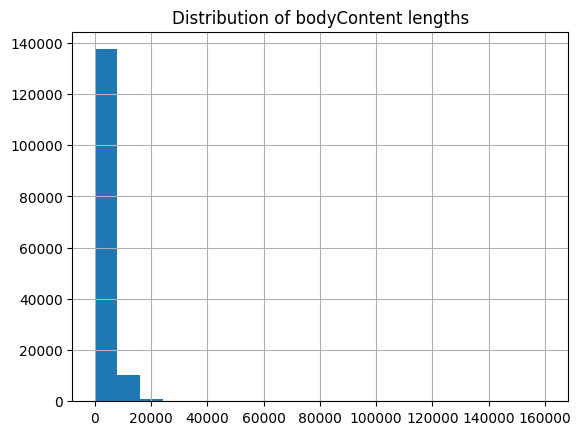

In [ ]:
# Explore the text data
text_col = 'bodyContent'
text_lengths = df[text_col].str.len()
text_lengths.hist(bins=20)
plt.title(f'Distribution of {text_col} lengths')
plt.show()

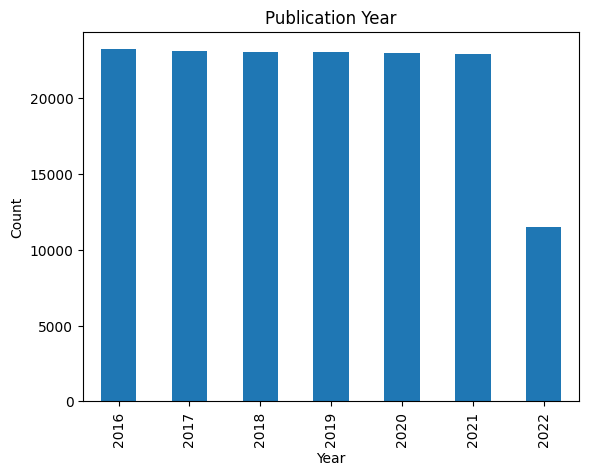

In [ ]:
# Explore the publication date
df['webPublicationDate'] = pd.to_datetime(df['webPublicationDate'])
df['publication_year'] = df['webPublicationDate'].dt.year
publication_year_counts = df['publication_year'].value_counts().sort_index()
publication_year_counts.plot(kind='bar')
plt.title('Publication Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

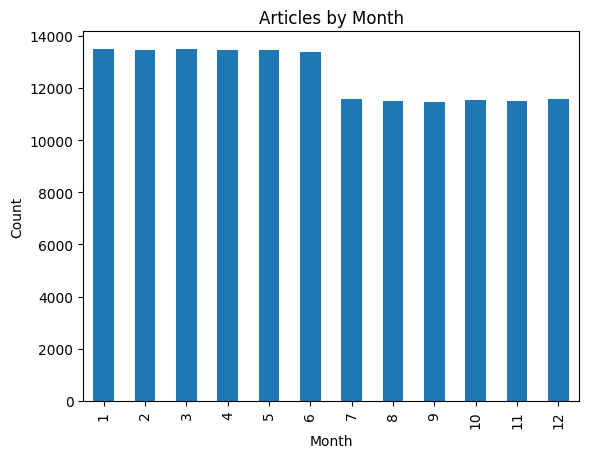

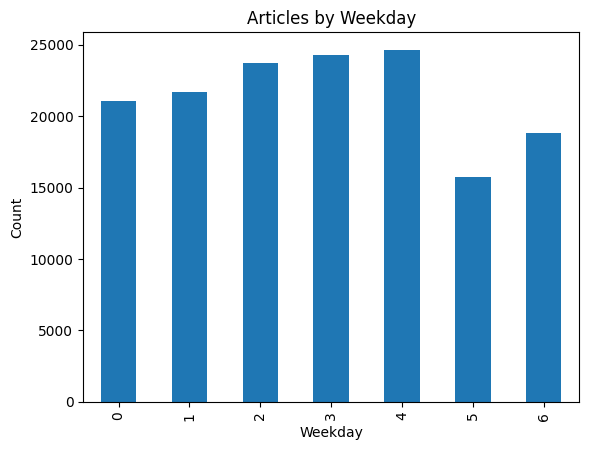

In [ ]:
# Calculate the length of each 'bodyContent' entry
df['bodyContent_length'] = df['bodyContent'].str.len()

# Find the index of the entry with the minimum content length
min_length_index = df['bodyContent_length'].idxmin()

# Find the index of the entry with the maximum content length
max_length_index = df['bodyContent_length'].idxmax()

# Get the 'webTitle' and content length values for the minimum and maximum content length entries
min_length_title = df.loc[min_length_index, 'webTitle']
min_length_content_length = df.loc[min_length_index, 'bodyContent_length']

max_length_title = df.loc[max_length_index, 'webTitle']
max_length_content_length = df.loc[max_length_index, 'bodyContent_length']

print(f"Title with the minimum content length: {min_length_title}")
print(f"Content length: {min_length_content_length}")

print(f"\nTitle with the maximum content length: {max_length_title}")
print(f"Content length: {max_length_content_length}")


Title with the minimum content length: Chatterbox: Friday
Content length: 1.0

Title with the maximum content length: Doctors, nurses, porters, volunteers: the UK health workers who have died from Covid-19
Content length: 160379.0


# FITTING NEURAL NETWORKS

LIBRARY IMPORT

In [ ]:
import tensorflow as tf
from  tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense,Embedding, Attention,LSTM, Dropout, Input

### Split on train and test data

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.head()

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id
0,us-news/2016/jan/31/iowa-caucus-underdog-candi...,US news,Iowa underdogs put on brave faces despite all ...,https://www.theguardian.com/us-news/2016/jan/3...,As polling day looms and the cameras turn only...,2016-01-31T23:53:37Z,1
1,us-news/2016/jan/31/iowa-caucus-worlds-most-pa...,US news,Iowa caucus: hologram eagle and Jesus star on ...,https://www.theguardian.com/us-news/2016/jan/3...,"In Des Moines on Sunday, the Guardian was give...",2016-01-31T23:46:28Z,2
2,world/2016/jan/31/tanzania-britsh-helicopter-p...,World news,British pilot in Tanzania 'manoeuvred ​to save...,https://www.theguardian.com/world/2016/jan/31/...,A British pilot who was shot dead by an elepha...,2016-01-31T23:43:48Z,3
3,football/2016/jan/31/late-winner-gets-usa-off-...,Football,USA 3-2 Iceland | International friendly match...,https://www.theguardian.com/football/2016/jan/...,USA took a step toward shaking off the ghosts ...,2016-01-31T23:30:49Z,4
4,football/2016/jan/31/blackburn-paul-lambert-ox...,Football,Reinvigorated Paul Lambert reflects after impr...,https://www.theguardian.com/football/2016/jan/...,"The clean-shaven, spectacle free and suspiciou...",2016-01-31T22:30:10Z,5


In [ ]:
df2=df[['webTitle','bodyContent' ]]
df2.head()


,webTitle,bodyContent
0,Iowa underdogs put on brave faces despite all ...,As polling day looms and the cameras turn only...
1,Iowa caucus: hologram eagle and Jesus star on ...,"In Des Moines on Sunday, the Guardian was give..."
2,British pilot in Tanzania 'manoeuvred ​to save...,A British pilot who was shot dead by an elepha...
3,USA 3-2 Iceland | International friendly match...,USA took a step toward shaking off the ghosts ...
4,Reinvigorated Paul Lambert reflects after impr...,"The clean-shaven, spectacle free and suspiciou..."


In [ ]:
df2=df2.sample(frac=0.2)

In [ ]:
df2.dropna(inplace=True)


In [ ]:
len(df2)


29746

In [ ]:
df2 = df2[df2['bodyContent'].str.len() < 2000]


In [ ]:
len(df2)

3366

In [ ]:
text=df2['bodyContent'].values.tolist()
summarisations=df2['webTitle'].values.tolist()

## Pegasus

In [ ]:
from transformers import PegasusTokenizer, TFPegasusForConditionalGeneration

In [ ]:
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")
model = TFPegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

# Tokenize and preprocess the data
inputs = tokenizer(text, padding="max_length", truncation=True, max_length=512, return_tensors="tf")
targets = tokenizer(summarisations, padding="max_length", truncation=True, max_length=64, return_tensors="tf")

# Prepare the inputs for fine-tuning
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]
labels = targets["input_ids"]



All model checkpoint layers were used when initializing TFPegasusForConditionalGeneration.

Some layers of TFPegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['final_logits_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
len(train_text)

2736

In [ ]:
# Prepare the inputs for fine-tuning
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]
labels = targets["input_ids"]

# Prepare decoder inputs for training (shift the labels to the left and pad)
decoder_input_ids = tf.concat([tf.ones_like(labels[:, :1]) * tokenizer.pad_token_id, labels[:, :-1]], axis=-1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import PegasusTokenizer

In [ ]:
# Load the Pegasus model for conditional generation
model = TFPegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

# Define the loss and optimizer
loss = SparseCategoricalCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=1e-5)

# Compile the model
model.compile(optimizer=optimizer, loss=loss)

# Checkpoint to save the best model during training
checkpoint = ModelCheckpoint("pegasus_finetuned.h5", monitor="loss", save_best_only=True, save_weights_only=True)

# Fine-tune the model
model.fit(
    [input_ids, attention_mask, decoder_input_ids],
    labels,
    batch_size=2,
    epochs=3,
    callbacks=[checkpoint]
)

All model checkpoint layers were used when initializing TFPegasusForConditionalGeneration.

Some layers of TFPegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['final_logits_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
1368/1368 [==============================] - 6684s 5s/step - loss: 8.3709
Epoch 2/3
1368/1368 [==============================] - 6953s 5s/step - loss: 1.6535
Epoch 3/3
1368/1368 [==============================] - 6953s 5s/step - loss: 0.6322


In [ ]:
def generate_summary(text, max_length=150, min_length=50):
    # Tokenize the input text
    inputs = tokenizer([text], max_length=max_length, truncation=True, return_tensors="pt")

    # Generate the summary
    summary_ids = model.generate(inputs.input_ids, max_length=max_length, min_length=min_length, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary


In [ ]:
df2.reset_index(drop=True, inplace=True)


In [ ]:
def generate_summary(text, max_length=150, min_length=50):
    # Tokenize the input text
    inputs = tokenizer([text], max_length=max_length, truncation=True, return_tensors="pt")

    # Generate the summary
    summary_ids = model.generate(inputs.input_ids, max_length=max_length, min_length=min_length, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary


In [ ]:
df['bodyContent'][0]

'As polling day looms and the cameras turn only toward the contenders to win the Iowa caucuses, at least some around nation can’t help but wonder: what happened to the other guys?\nOn the final weekend before the Iowa caucuses, the presidential candidates straggling behind the leaders – Donald Trump, Ted Cruz and Marco Rubio for the Republicans, Hillary Clinton and Bernie Sanders for the Democrats – carried on with brave faces, despite sinking poll numbers and ambivalent voters. Underdog candidates could, however, have an outsize effect on the campaign: their supporters represent the spread between the leaders. Sway voters who prefer a third- (or fourth- or fifth-) tier contender could bring another candidate closer to the nomination. For example supporters of the third Democratic candidate, Martin O’Malley, polling at 3% in Iowa could ultimately sway the race on Monday. According to caucus rules, a candidate must have support from 15% of caucus-goers in any given precinct to reach “vi

As polling day looms and the cameras turn only toward the contenders to win the Iowa caucuses, at least some around nation can’t help but wonder: what happened to the other guys?
On the final weekend before the Iowa caucuses, the presidential candidates straggling behind the leaders – Donald Trump, Ted Cruz and Marco Rubio for the Republicans, Hillary Clinton and Bernie Sanders for the Democrats – carried on with brave faces, despite sinking poll numbers and ambivalent voters. Underdog candidates could, however, have an outsize effect on the campaign: their supporters represent the spread between the leaders. Sway voters who prefer a third- (or fourth- or fifth-) tier contender could bring another candidate closer to the nomination. For example supporters of the third Democratic candidate, Martin O’Malley, polling at 3% in Iowa could ultimately sway the race on Monday. According to caucus rules, a candidate must have support from 15% of caucus-goers in any given precinct to reach “viability”. If too few voters support a candidate, they are free to support another. Both the Clinton and Sanders camps have sought to win over O’Malley backers. Nonetheless, on Saturday in Boone, Iowa, the former governor of Maryland told supporters not to waver. “Hold strong in that first alignment,” he said. “We have to beat expectations. I’m hoping and working to make my campaign the surprise that comes out of Iowa.”
Touring the state he won eight years ago, meanwhile, Republican Mike Huckabee projected the aura of a tired heritage act as he spoke to Iowans in small-town clubs and bars. One part preacher to two parts standup guy, the former Arkansas governor charmed the room at the Inspired Grounds coffee shop in West Des Moines. But after visiting all 99 counties these past eight months, he is nowhere in the polls. “I’m going to be glad,” he told the gathering, “when we finally actually base this whole election on votes rather than some east coast pollster who has never spent a night in Iowa, and doesn’t have a clue about voters who are going to be going to the caucuses.” In the age of Instagram and viral videos, Huckabee spoke up for “the old-fashioned way” of electioneering. “Hard work and handshakes”, he said are the real way to pass your audition for a job at the White House. There was no policy pitch, except for a moment to hymn the value of lawmaking experience and warn of the danger of appointing as president another untried freshman senator – a swipe at Ted Cruz, Marco Rubio and Rand Paul. Outside, Gary Leffler, a resident and Huckabee supporter, said the former governor is “a man of faith, a man of God”, and that “you have to vote on principle and I’m a principled man”. Asked about the long odds of his preferred candidate, Leffler said he would at least vote Republican no matter what. Huckabee’s rival Ben Carson, a retired neurosurgeon whose support in the state peaked at 25% but has now dropped to 10%, pledged to voters that he would defy the odds.
“We’re seeing a lot of movement on the ground, there’s a lot of shifting going on right now,” Carson told the Detroit News on Friday, in south-east Iowa. “It almost feels like an earthquake. And I think a lot of it is shifting in our favor. So we’re actually looking forward to a very good night, which would be quite surprising, I think, to a lot of pundits.” Another one-time frontrunner, former Florida governor Jeb Bush, has seen his numbers steadily decline to the point that he found 2% support in the Register poll – neck-and-neck with “undecided”. In recent days Bush has traveled with his wife Columba and daughter Noelle. Next month, they will be joined in New Hampshire by their four grandchildren and former president George W Bush.
In Sioux City, he told reporters: “This is a family deal, especially when you get to the beginning of the end.” Chris Christie, the governor of New Jersey, made the rounds in Iowa, with a stop at the Chrome Horse Saloon in Cedar Rapids. “When you see me in a place like this,” he told the crowd, “I become smarter and more charming and better looking and funny. By the time you walk out of here, you are going to be, ‘Damn, man, that guy should be emperor.’” Christie, the Financial Times reported, cautioned the crowd against supporting Trump, the Republican frontrunner. “Showtime is over,” he said. “We are not electing the entertainer-in-chief, everybody … we are electing the commander-in-chief. This isn’t a game. This isn’t a TV show. This is the real world.” Carly Fiorina, too, has walked a long road in Iowa, pushing her program to “take our government back”. In Mason City, USA Today reported, the former Hewlett-Packard CEO tried to explain her concept of zero-based budgeting. “It means you can examine any dollar, you can cut any dollar and you can move any dollar. All the government does now is discuss the rate of increase.” Senator Rand Paul, too, predicted he will surprise in Monday’s caucus, arguing that polls are skewed toward older voters, not the younger voters who rally to his pro-liberty positions. He told NBC on Sunday that his campaign has called “a million” Iowans: “I think we’ve called them so much we know them by name by now.”
And Ohio governor John Kasich, recently endorsed by the New York Times as their editorial board’s Republican of choice, gave up on Iowa almost completely. He campaigned in New Hampshire, accompanied by a guitarist, and said he was “thrilled” by the newspaper’s endorsement. “It really illustrates for a lot of people that Kasich’s a conservative but he has wide appeal,” Kasich told reporters. “He can get people to come who traditionally don’t go. And the last guy I can think of who could do that is Ronald Reagan.” Lauren Gambino contributed to this report.

In [ ]:
 generate_summary(df['bodyContent'][0], max_length=150, min_length=50)

'What’s going on with the other guys in the race for the Republican and Democratic presidential nominations in the final weekend before the Iowa caucuses? – here’s why it’s not all about the frontrunners: here’s why it’s all about the underdogs'

In [ ]:
df2['bodyContent']

0       A winning blend of pop melodies and shoegaze t...
1       Two men have been killed in a light aircraft c...
2       The former MLB player Aubrey Huff is taking Be...
3       My father died in May and, try as I might, I c...
4       That Sleaford Mods’ three most recent albums h...
                              ...                        
3416    Have you ever had to do a stocktake of your fr...
3417    A dire British misfire about three fiftysometh...
3418    We’d like to hear from first year students in ...
3419    Last August I ordered a £95 desk chair from Cu...
3420    • An opinion article was wrong to say that a c...
Name: bodyContent, Length: 3421, dtype: object

Some examples of model from th original dataset

In [ ]:
df['bodyContent'][3420]

'“I want my daughter to be internationally successful. I want her to be whatever she wants. And I want people to respect her.” These words were spoken by Mohammad, a middle-aged Saudi-Arabian partner of a major global management consultancy, during a panel debate I recently attended in Riyadh. I found his ambitions for his daughter easy to identify with. They parallel with my feelings about the freedoms and rights I expect for my own eight-year-old daughter. Sadly, it would seem not everyone shares Mohammad’s sentiments. Saudi Arabia ranks 20th out of 22 for women’s rights in the Arab states, and 130th out of 142 countries measured in the World Economic Forum’s Global Gender Gap report.\nThe western media has extensively covered women’s disenfranchisement in the country, and I don’t just mean the ban on driving; women cannot travel freely and are mostly excluded from the world outside the home. The biggest issue here is the male guardianship of women, meaning that they need their male 

In [ ]:
 generate_summary(df['bodyContent'][3420], max_length=150, min_length=50)

'Women’s rights in Saudi Arabia: what is it like to be a father in a country where women are not allowed to vote or leave their homes? – Fatima al-Kadhim | Letters I want my daughter to be successful but I also want people to respect her'

In [ ]:
df['bodyContent'][100]

'Simon Rattle’s debut appearance at London’s chamber-music HQ – as pianist, not conductor – was a kind of bring-your-husband-to-work day for mezzo-soprano Magdalena Kožená, who has her own series of concerts there this season. Presumably it was Rattle’s presence that so inflated the ticket prices; but the performance itself took a long while to come anywhere near justifying them. Six other formidable musicians were onstage: a string quartet drawn mainly from Rattle’s Berlin Philharmonic, flautist Kaspar Zehnder, and Andrew Marriner, who will be Rattle’s principal clarinettist when he takes over the LSO. The first half was intriguingly programmed, mostly songs on a Shakespearian theme. Kožená wove gleaming, elastic threads around the muted strings and piano in Chausson’s Chanson Perpétuelle, but was less comfortable sparring with flute, viola and clarinet in Stravinsky’s three lean Songs from William Shakespeare.\nDuetting with Rattle in Strauss’s Ophelia Songs, she was more confident; 

In [ ]:
 generate_summary(df['bodyContent'][100], max_length=150, min_length=50)

"Simon Rattle's debut concert at London's LSO HQ was a bit of a bring-your-husband moment: Magdalena Koen and Magdalena Koen review – and it wasn't so much that it was too much fun"

## T5

In [2]:
!pip install sentencepiece
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00


In [3]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import math
import tqdm
import torch


In [16]:
df.dropna(inplace=True)
df2=df[['webTitle','bodyContent' ]]
df2=df2.sample(frac=0.2)
df2.dropna(inplace=True)
df2 = df2[df2['bodyContent'].str.len() < 2000]
T5_text=df2['bodyContent'].values.tolist()
T5_summarisations=df2['webTitle'].values.tolist()

In [17]:
T5_train_text,T5_valid_text, T5_train_summary, T5_valid_summary = train_test_split(T5_text,T5_summarisations,test_size=0.2,random_state=0)

In [18]:
print(f' Train Text Size: {len(T5_train_text)}\n Train Summary Size: {len(T5_train_summary)} \n\n Valid Text Size: {len(T5_valid_text)} \n Valid Summary Size: {len(T5_valid_summary)}')

 Train Text Size: 2728
 Train Summary Size: 2728 

 Valid Text Size: 682 
 Valid Summary Size: 682


In [19]:
#Creating dictionary for both tain and test data

# Creating dictionary for both train and test data
train_dict = dict(zip(T5_train_text, T5_train_summary))
valid_dict = dict(zip(T5_valid_text, T5_valid_summary))

# Converting train_dict to T5_train
T5_train = {index: {"text": text, "summary": summary} for index, (text, summary) in enumerate(train_dict.items())}

# Converting valid_dict to T5_valid
T5_valid = {index: {"text": text, "summary": summary} for index, (text, summary) in enumerate(valid_dict.items())}


In [20]:
T5_train[0]

{'text': 'They say that after leaving school people continue to have anxiety dreams about facing exams for the rest of their life. Now’s your chance to relive that horror, by tackling the type of questions set to test the mathematics knowledge of England and Wales’s 15- and 16-year-olds. Sadly, in order to make the questions work online, we are not able to present the most complicated ones – and we have got to give you multiple choice options for the answers. And unlike real students, you do not have to show your working. Although you can always post it in to us if you feel so inclined. Take these 10 GCSE maths questions\nAll questions taken from AQA’s GCSE mathematics specimen papers published in June 2015.',
 'summary': 'Could you pass maths GCSE?'}

In [21]:
T5_valid[0]

{'text': '• The subheading of a feature said the photographer Michal Iwanowski walked 12,000 miles from Cardiff in Wales to Mokrzeszów in Poland. We meant to say 1,200 miles (I walked the line, 24 September, page 10, G2). • A feature said Donald Trump made a fortune from Miss America. Trump owned a different beauty pageant, Miss Universe (Ask Hadley, 20 September, page 5, G2). • Other recently corrected articles include: Why isn’t Mark Judge testifying about Kavanaugh? He is an alleged witness Build a wall across the Sahara? That’s crazy – but someone still did it Welfare spending for UK’s poorest shrinks by £37bn Knock Knock review – ‘I like a laugh as much as the next miserable critic!’',
 'summary': 'Corrections and clarifications'}

In [22]:
# Define a custom Dataset class to handle tokenization and batching
class CustomDataset(Dataset):
    def __init__(self, dataset, tokenizer, max_length):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        item = self.dataset[index]
        inputs = self.tokenizer.encode_plus(
            item["text"],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        labels = self.tokenizer.encode_plus(
            item["summary"],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
        )
        return inputs["input_ids"].squeeze(), labels["input_ids"].squeeze()



In [23]:
def calculate_perplexity(loss):
    return math.exp(loss)

In [24]:
# Define T5 model for fine-tuning
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Define training parameters
batch_size = 8
num_epochs = 10
learning_rate = 1e-4


You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [26]:
# Create DataLoader for the dataset
dataset = CustomDataset(T5_train, tokenizer, max_length=512)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Set the model to training mode
model.train()

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)


In [ ]:
# Fine-tune the model
for epoch in tqdm.tqdm(range(num_epochs)):
    total_loss = 0.0
    num_batches = 0
    losses = []

    for inputs, labels in tqdm.tqdm(dataloader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        inputs = inputs.to(torch.int64).to(device)
        labels = labels.to(torch.int64).to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=inputs, labels=labels).loss
        outputs.backward()
        optimizer.step()

        total_loss += outputs.item()
        num_batches += 1

    average_loss = total_loss / num_batches
    losses.append(average_loss)
    perplexity = calculate_perplexity(average_loss)

    print(f"Epoch {epoch + 1}/{num_epochs},, Average Loss: {average_loss:.4f}, Perplexity: {perplexity:.2f}")

    # Save the model and related data
    model_data = {
            'epoch': epoch + 1,
            'loss': losses,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }
    torch.save(model_data, "T5_model_checkpoint.pt")





Epoch 1/10: 100%|██████████| 329/329 [26:06<00:00,  4.76s/it]


Epoch 1/10,, Average Loss: 0.2991, Perplexity: 1.35


Epoch 2/10: 100%|██████████| 329/329 [27:56<00:00,  5.10s/it]


Epoch 2/10,, Average Loss: 0.1061, Perplexity: 1.11


Epoch 3/10: 100%|██████████| 329/329 [31:04<00:00,  5.67s/it]


Epoch 3/10,, Average Loss: 0.0896, Perplexity: 1.09


Epoch 4/10: 100%|██████████| 329/329 [31:46<00:00,  5.80s/it]


Epoch 4/10,, Average Loss: 0.0828, Perplexity: 1.09


Epoch 5/10: 100%|██████████| 329/329 [33:08<00:00,  6.04s/it]


Epoch 5/10,, Average Loss: 0.0784, Perplexity: 1.08


Epoch 6/10: 100%|██████████| 329/329 [33:48<00:00,  6.17s/it]


Epoch 6/10,, Average Loss: 0.0743, Perplexity: 1.08


Epoch 7/10: 100%|██████████| 329/329 [33:22<00:00,  6.09s/it]


Epoch 7/10,, Average Loss: 0.0709, Perplexity: 1.07


Epoch 8/10: 100%|██████████| 329/329 [34:00<00:00,  6.20s/it]


Epoch 8/10,, Average Loss: 0.0677, Perplexity: 1.07


Epoch 9/10: 100%|██████████| 329/329 [34:28<00:00,  6.29s/it]


Epoch 9/10,, Average Loss: 0.0650, Perplexity: 1.07


Epoch 10/10: 100%|██████████| 329/329 [34:04<00:00,  6.21s/it]


Epoch 10/10,, Average Loss: 0.0622, Perplexity: 1.06


100%|██████████| 10/10 [5:20:45<00:00, 1924.54s/it]


In [29]:
PATH = "/content/T5_model_checkpoint.pt"
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint["model_state_dict"], strict=False)

<All keys matched successfully>

In [33]:
def infer(inp, max_length=50):
    inp = "<startofstring> " + inp + " <Summary>: "
    inp = tokenizer(inp, return_tensors="pt")
    X = inp["input_ids"].to(device).to(torch.int64)
    a = inp["attention_mask"].to(device).to(torch.int64)
    with torch.no_grad():
        output = model.generate(X, attention_mask=a, max_length=max_length, num_return_sequences=1)
    output = tokenizer.decode(output[0])
    return output

In [35]:
print("Inference from T5 model : ")

while True:
  inp = input("Enter input (or 'exit' to quit): ")
  if inp.lower() == 'exit':
    print("Exiting the loop...")
    break
  result = infer(inp)
  print(result)

Inference from T5 model : 
Enter input (or 'exit' to quit): As polling day looms and the cameras turn only toward the contenders to win the Iowa caucuses, at least some around nation can’t help but wonder: what happened to the other guys? On the final weekend before the Iowa caucuses, the presidential candidates straggling behind the leaders – Donald Trump, Ted Cruz and Marco Rubio for the Republicans, Hillary Clinton and Bernie Sanders for the Democrats – carried on with brave faces, despite sinking poll numbers and ambivalent voters. Underdog candidates could, however, have an outsize effect on the campaign: their supporters represent the spread between the leaders. Sway voters who prefer a third- (or fourth- or fifth-) tier contender could bring another candidate closer to the nomination. For example supporters of the third Democratic candidate, Martin O’Malley, polling at 3% in Iowa could ultimately sway the race on Monday. According to caucus rules, a candidate must have support f

##**GPT2**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.4 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
import torch.nn as nn
import torch
import tqdm
import math

### Creating Dataset for GPT2 based on the above dataframe

In [ ]:
df.dropna(inplace=True)
df2=df[['webTitle','bodyContent' ]]
df2=df2.sample(frac=0.2)
df2.dropna(inplace=True)
df2 = df2[df2['bodyContent'].str.len() < 2000]
GPT_text=df2['bodyContent'].values.tolist()
GPT_summarisations=df2['webTitle'].values.tolist()

In [ ]:
GPT_train_text, GPT_valid_text, GPT_train_summary, GPT_valid_summary = train_test_split(GPT_text,GPT_summarisations,test_size=0.2,random_state=0)

In [ ]:
print(f' Train Text Size: {len(GPT_train_text)}\n Train Summary Size: {len(GPT_train_summary)} \n\n Valid Text Size: {len(GPT_valid_text)} \n Valid Summary Size: {len(GPT_valid_summary)}')

 Train Text Size: 2694
 Train Summary Size: 2694 

 Valid Text Size: 674 
 Valid Summary Size: 674


In [ ]:
#Creating dictionary for both tain and test data

# Creating dictionary for both train and test data
train_dict = dict(zip(GPT_train_text, GPT_train_summary))
valid_dict = dict(zip(GPT_valid_text, GPT_valid_summary))

# Converting train_dict to GPT_train
GPT_train = {index: {"text": text, "summary": summary} for index, (text, summary) in enumerate(train_dict.items())}

# Converting valid_dict to GPT_valid
GPT_valid = {index: {"text": text, "summary": summary} for index, (text, summary) in enumerate(valid_dict.items())}


In [ ]:
GPT_train[0]

{'text': 'Although my last conversation with David Foot was about cricket, I benefited greatly from knowing him as a football writer. My favourite Foot story concerned his role at the Yeovil v Sunderland FA Cup tie in 1949. As the national press descended on Huish Park, the reporters lacked phone access to Fleet Street. So 19-year-old David was recruited to stand in the outside Gents, waiting for periodic updates to be lowered from the press box on a string. He then had to run up to the butcher’s and phone through the latest.',
 'summary': 'Letter: David Foot obituary'}

In [ ]:
GPT_valid[0]

{'text': 'The UK’s largest rock and heavy metal festival has announced a trio of headliners for its 15th edition. They include Def Leppard, who will be performing their bestselling fourth album, Hysteria, in full, as well as cult prog-rockers Tool, and the masked metal group Slipknot. Download festival takes place at Donington Park, Leicestershire, on 14-16 June. Tool’s appearance at the weekender marks their first Download gig since headlining the festival in 2006. In September, vocalist Maynard James Keenan hinted that the band are working on their first album in more than a decade, likely to be released next year. Since they formed in Sheffield in 1977, Def Leppard have sold more than 100m records, with Hysteria (1987) selling more than 25m copies worldwide and spawning one of their most recognisable hits, Pour Some Sugar on Me. They have headlined the festival twice, in 2009 and 2011. Their forthcoming performance will mark their only UK performance in 2019. Slipknot have performed

In [ ]:
class GPTData(Dataset):
    def __init__(self, GPT_data , tokenizer):
        self.data = GPT_data
        self.X = []

        for index, entry in self.data.items():
            try:
                # Generate the concatenated string and append it to self.X
                text_summary = "<startofstring> " + entry["text"] + " <Summary>: " + entry["summary"] + " <endofstring>"
                self.X.append(text_summary)
            except:
                break

        self.X_encoded = tokenizer(self.X, max_length=512, truncation=True, padding="max_length", return_tensors="pt")
        self.input_ids = self.X_encoded['input_ids']
        self.attention_mask = self.X_encoded['attention_mask']

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return (self.input_ids[idx], self.attention_mask[idx])


In [ ]:
#Perplexity measures how well the model predicts the next word in a sequence, and lower perplexity values indicate better performance.
def calculate_perplexity(loss):
    return math.exp(loss)

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.add_special_tokens({"pad_token": "<pad>",
                                "bos_token": "<startofstring>",
                                "eos_token": "<endofstring>"})

tokenizer.add_tokens(["<Summary>:"])

model = GPT2LMHeadModel.from_pretrained("gpt2")
model.resize_token_embeddings(len(tokenizer))

Embedding(50261, 768)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [ ]:
Data = GPTData(GPT_train, tokenizer)
Summarization_Data =  DataLoader(Data, batch_size=8)

In [ ]:
model.train()
optim = Adam(model.parameters(), lr=1e-3)

In [ ]:
def train(Data, model, optim):
    epochs = 5

    for i in tqdm.tqdm(range(epochs)):
        total_loss = 0.0
        num_batches = 0
        losses = []

        for X, a in tqdm.tqdm(Data, desc=f"Epoch {i + 1}/{epochs}"):
            X = X.to(device)
            a = a.to(device)
            optim.zero_grad()
            loss = model(X, attention_mask=a, labels=X).loss
            loss.backward()
            optim.step()

            total_loss += loss.item()
            num_batches += 1

        average_loss = total_loss / num_batches
        losses.append(average_loss)
        perplexity = calculate_perplexity(average_loss)

        print(f"Epoch {i + 1}/{epochs}, Average Loss: {average_loss:.4f}, Perplexity: {perplexity:.2f}")

         # Save the model and related data
        model_data = {
            'epoch': i + 1,
            'loss': losses,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optim.state_dict(),
        }
        torch.save(model_data, "GPT2_model_checkpoint.pt")

    print("Training completed!")



def infer(inp, max_length=50):
    inp = inp + " <Summary>: "
    inp = tokenizer(inp, return_tensors="pt")
    X = inp["input_ids"].to(device).to(torch.int64)
    a = inp["attention_mask"].to(device).to(torch.int64)
    with torch.no_grad():
        output = model.generate(X, attention_mask=a, max_length=max_length, num_return_sequences=1)
    output = tokenizer.decode(output[0])
    return output


In [ ]:
print("training .... ")
train(Summarization_Data,  model, optim)


training .... 


Epoch 1/5: 100%|██████████| 326/326 [06:39<00:00,  1.22s/it]


Epoch 1/5, Average Loss: 4.5870, Perplexity: 98.20


Epoch 2/5: 100%|██████████| 326/326 [06:50<00:00,  1.26s/it]


Epoch 2/5, Average Loss: 2.2825, Perplexity: 9.80


Epoch 3/5: 100%|██████████| 326/326 [06:50<00:00,  1.26s/it]


Epoch 3/5, Average Loss: 1.8962, Perplexity: 6.66


Epoch 4/5: 100%|██████████| 326/326 [07:00<00:00,  1.29s/it]


Epoch 4/5, Average Loss: 1.6179, Perplexity: 5.04


Epoch 5/5: 100%|██████████| 326/326 [07:00<00:00,  1.29s/it]


Epoch 5/5, Average Loss: 1.3810, Perplexity: 3.98


100%|██████████| 5/5 [35:01<00:00, 420.22s/it]

Training completed!


In [ ]:
# # load the model
PATH = "/content/GPT2_model_checkpoint.pt"
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint["model_state_dict"], strict=False)


<All keys matched successfully>

In [ ]:
# # load the model from the drive (Testing the drive)
PATH = "/content/drive/MyDrive/Model/GPT2_model_checkpoint.pt"
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint["model_state_dict"], strict=False)


<All keys matched successfully>

In [ ]:
GPT_train[0]

'This is the season for mushrooms, but there’s one particular menace this autumn: the death cap mushroom. Amanita phalloides is Britain’s deadliest mushroom and it’s been reported in unusually large numbers in the run of mild, damp weather.\nIt’s been estimated that as little as half a death cap mushroom is enough to kill an adult and, worldwide, this species has caused more deaths than any other mushroom. Worse still, death caps have been reported to taste quite pleasant, and symptoms of poisoning may not appear for up to 24 hours after they have been eaten. To make life even more difficult, it’s easy to mistake the death cap for some edible mushrooms. They can be distinguished by a pale green cap, a bulbous ring at the bottom of the stalk and a ring-like collar at the top. But the cap can be white like an edible field mushroom, and the young unopened cap conceals its telltale white gills – a field mushroom has darker gills – and can also be mistaken for an edible young puffball.\nThe

In [ ]:
GPT_train[100]

{'text': 'Jonas Gwangwa, the Oscar-nominated South African jazz musician who campaigned against apartheid for decades, has died aged 83. The cause of death has not been announced. South African president Cyril Ramaphosa led tributes, saying: A giant of our revolutionary cultural movement and our democratic creative industries has been called to rest; the trombone that boomed with boldness and bravery, and equally warmed our hearts with mellow melody has lost its life force. Jonas Gwangwa ascends to our great orchestra of musical ancestors whose creative genius and dedication to the freedom of all South Africans inspired millions in our country and mobilised the international community against the apartheid system. Gwangwa, a trombonist, was born in 1937 and first found fame in the 50s with the Jazz Epistles, playing alongside musicians who would become some of South Africa’s biggest jazz stars: trumpeter Hugh Masekela, pianist Abdullah Ibrahim, and saxophonist Kippie Moeketsi. In 1959,

In [ ]:
GPT_train[101]

{'text': 'Is it a splendid hilltop where the views stretch out forever, a square in your favourite city or a sandy beach untouched except for the shack selling cold drinks and fresh fish? Maybe it’s just a cosy country pub filled with all your mates … This week we’d like you to tell us about that blissful spot you travel to in your imagination or memory when staying at home has got really stale. Use the form below to tell us about it – keeping your tip to about 100 words. Send your tip by Tuesday 5 May at 10am BST. We’re afraid that in these difficult times, there is no prize on offer for the week’s best entry – though hopefully that will return soon. But in the spirit of solidarity and optimism, we’d still love you share your memories with fellow readers. That also means you do not need to be a UK resident to submit a tip. Have a look at our past winners and other tips Photographs are very welcome if they are high-quality (at least 700 pixels wide please) and you are happy to share th

In [ ]:
GPT_train[0]['summary']

'Death cap mushrooms – killer on the forest floor'

In [ ]:
GPT_train[101]

{'text': 'Is it a splendid hilltop where the views stretch out forever, a square in your favourite city or a sandy beach untouched except for the shack selling cold drinks and fresh fish? Maybe it’s just a cosy country pub filled with all your mates … This week we’d like you to tell us about that blissful spot you travel to in your imagination or memory when staying at home has got really stale. Use the form below to tell us about it – keeping your tip to about 100 words. Send your tip by Tuesday 5 May at 10am BST. We’re afraid that in these difficult times, there is no prize on offer for the week’s best entry – though hopefully that will return soon. But in the spirit of solidarity and optimism, we’d still love you share your memories with fellow readers. That also means you do not need to be a UK resident to submit a tip. Have a look at our past winners and other tips Photographs are very welcome if they are high-quality (at least 700 pixels wide please) and you are happy to share th

In [ ]:
GPT_train[101]['text']

'Is it a splendid hilltop where the views stretch out forever, a square in your favourite city or a sandy beach untouched except for the shack selling cold drinks and fresh fish? Maybe it’s just a cosy country pub filled with all your mates … This week we’d like you to tell us about that blissful spot you travel to in your imagination or memory when staying at home has got really stale. Use the form below to tell us about it – keeping your tip to about 100 words. Send your tip by Tuesday 5 May at 10am BST. We’re afraid that in these difficult times, there is no prize on offer for the week’s best entry – though hopefully that will return soon. But in the spirit of solidarity and optimism, we’d still love you share your memories with fellow readers. That also means you do not need to be a UK resident to submit a tip. Have a look at our past winners and other tips Photographs are very welcome if they are high-quality (at least 700 pixels wide please) and you are happy to share them but it

In [ ]:
print("Inference from GPT model : ")

while True:
  print('=' * 100)
  inp = input("Enter input (or 'exit' to quit): ")
  if inp.lower() == 'exit':
    print("Exiting the loop...")
    break
  result = infer(inp)
  print(result)

Inference from GPT model : 
Enter input (or 'exit' to quit): Simon Rattle’s debut appearance at London’s chamber-music HQ – as pianist, not conductor – was a kind of bring-your-husband-to-work day for mezzo-soprano Magdalena Kožená, who has her own series of concerts there this season. Presumably it was Rattle’s presence that so inflated the ticket prices; but the performance itself took a long while to come anywhere near justifying them. Six other formidable musicians were onstage: a string quartet drawn mainly from Rattle’s Berlin Philharmonic, flautist Kaspar Zehnder, and Andrew Marriner, who will be Rattle’s principal clarinettist when he takes over the LSO. The first half was intriguingly programmed, mostly songs on a Shakespearian theme. Kožená wove gleaming, elastic threads around the muted strings and piano in Chausson’s Chanson Perpétuelle, but was less comfortable sparring with flute, viola and clarinet in Stravinsky’s three lean Songs from William Shakespeare. Duetting with 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 552, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Simon Rattle’s debut appearance at London’s chamber-music HQ – as pianist, not conductor – was a kind of bring-your-husband-to-work day for mezzo-soprano Magdalena Kožená, who has her own series of concerts there this season. Presumably it was Rattle’s presence that so inflated the ticket prices; but the performance itself took a long while to come anywhere near justifying them. Six other formidable musicians were onstage: a string quartet drawn mainly from Rattle’s Berlin Philharmonic, flautist Kaspar Zehnder, and Andrew Marriner, who will be Rattle’s principal clarinettist when he takes over the LSO. The first half was intriguingly programmed, mostly songs on a Shakespearian theme. Kožená wove gleaming, elastic threads around the muted strings and piano in Chausson’s Chanson Perpétuelle, but was less comfortable sparring with flute, viola and clarinet in Stravinsky’s three lean Songs from William Shakespeare. Duetting with Rattle in Strauss’s Ophelia Songs, she was more confident; bu

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 349, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


This is the season for mushrooms, but there’s one particular menace this autumn: the death cap mushroom. Amanita phalloides is Britain’s deadliest mushroom and it’s been reported in unusually large numbers in the run of mild, damp weather. It’s been estimated that as little as half a death cap mushroom is enough to kill an adult and, worldwide, this species has caused more deaths than any other mushroom. Worse still, death caps have been reported to taste quite pleasant, and symptoms of poisoning may not appear for up to 24 hours after they have been eaten. To make life even more difficult, it’s easy to mistake the death cap for some edible mushrooms. They can be distinguished by a pale green cap, a bulbous ring at the bottom of the stalk and a ring-like collar at the top. But the cap can be white like an edible field mushroom, and the young unopened cap conceals its telltale white gills – a field mushroom has darker gills – and can also be mistaken for an edible young puffball. The st

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 416, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Jonas Gwangwa, the Oscar-nominated South African jazz musician who campaigned against apartheid for decades, has died aged 83. The cause of death has not been announced. South African president Cyril Ramaphosa led tributes, saying: A giant of our revolutionary cultural movement and our democratic creative industries has been called to rest; the trombone that boomed with boldness and bravery, and equally warmed our hearts with mellow melody has lost its life force. Jonas Gwangwa ascends to our great orchestra of musical ancestors whose creative genius and dedication to the freedom of all South Africans inspired millions in our country and mobilised the international community against the apartheid system. Gwangwa, a trombonist, was born in 1937 and first found fame in the 50s with the Jazz Epistles, playing alongside musicians who would become some of South Africa’s biggest jazz stars: trumpeter Hugh Masekela, pianist Abdullah Ibrahim, and saxophonist Kippie Moeketsi. In 1959, he and th

In [ ]:
print("Inference from GPT model : ")

while True:
  print('=' * 100)
  inp = input("Enter input (or 'exit' to quit): ")
  if inp.lower() == 'exit':
    print("Exiting the loop...")
    break
  result = infer(inp)
  print(result)

Inference from GPT model : 
Enter input (or 'exit' to quit): Is it a splendid hilltop where the views stretch out forever, a square in your favourite city or a sandy beach untouched except for the shack selling cold drinks and fresh fish? Maybe it’s just a cosy country pub filled with all your mates … This week we’d like you to tell us about that blissful spot you travel to in your imagination or memory when staying at home has got really stale. Use the form below to tell us about it – keeping your tip to about 100 words. Send your tip by Tuesday 5 May at 10am BST. We’re afraid that in these difficult times, there is no prize on offer for the week’s best entry – though hopefully that will return soon. But in the spirit of solidarity and optimism, we’d still love you share your memories with fellow readers. That also means you do not need to be a UK resident to submit a tip. Have a look at our past winners and other tips Photographs are very welcome if they are high-quality (at least 70

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 280, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Is it a splendid hilltop where the views stretch out forever, a square in your favourite city or a sandy beach untouched except for the shack selling cold drinks and fresh fish? Maybe it’s just a cosy country pub filled with all your mates … This week we’d like you to tell us about that blissful spot you travel to in your imagination or memory when staying at home has got really stale. Use the form below to tell us about it – keeping your tip to about 100 words. Send your tip by Tuesday 5 May at 10am BST. We’re afraid that in these difficult times, there is no prize on offer for the week’s best entry – though hopefully that will return soon. But in the spirit of solidarity and optimism, we’d still love you share your memories with fellow readers. That also means you do not need to be a UK resident to submit a tip. Have a look at our past winners and other tips Photographs are very welcome if they are high-quality (at least 700 pixels wide please) and you are happy to share them but it 

**Inference related to pegasus** - (df['bodyContent'][100])

In [ ]:
print("Inference from GPT model : ")

while True:
  print('=' * 100)
  inp = input("Enter input (or 'exit' to quit): ")
  if inp.lower() == 'exit':
    print("Exiting the loop...")
    break
  result = infer(inp)
  print(result)

Inference from GPT model : 
Enter input (or 'exit' to quit): Simon Rattle’s debut appearance at London’s chamber-music HQ – as pianist, not conductor – was a kind of bring-your-husband-to-work day for mezzo-soprano Magdalena Kožená, who has her own series of concerts there this season. Presumably it was Rattle’s presence that so inflated the ticket prices; but the performance itself took a long while to come anywhere near justifying them. Six other formidable musicians were onstage: a string quartet drawn mainly from Rattle’s Berlin Philharmonic, flautist Kaspar Zehnder, and Andrew Marriner, who will be Rattle’s principal clarinettist when he takes over the LSO. The first half was intriguingly programmed, mostly songs on a Shakespearian theme. Kožená wove gleaming, elastic threads around the muted strings and piano in Chausson’s Chanson Perpétuelle, but was less comfortable sparring with flute, viola and clarinet in Stravinsky’s three lean Songs from William Shakespeare. Duetting with 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 552, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Simon Rattle’s debut appearance at London’s chamber-music HQ – as pianist, not conductor – was a kind of bring-your-husband-to-work day for mezzo-soprano Magdalena Kožená, who has her own series of concerts there this season. Presumably it was Rattle’s presence that so inflated the ticket prices; but the performance itself took a long while to come anywhere near justifying them. Six other formidable musicians were onstage: a string quartet drawn mainly from Rattle’s Berlin Philharmonic, flautist Kaspar Zehnder, and Andrew Marriner, who will be Rattle’s principal clarinettist when he takes over the LSO. The first half was intriguingly programmed, mostly songs on a Shakespearian theme. Kožená wove gleaming, elastic threads around the muted strings and piano in Chausson’s Chanson Perpétuelle, but was less comfortable sparring with flute, viola and clarinet in Stravinsky’s three lean Songs from William Shakespeare. Duetting with Rattle in Strauss’s Ophelia Songs, she was more confident; bu